## Name: Jared Egerer
## Date: 4 April 2023

### Assignment: Project 2 - Data Analysis with Python

**Step 1: Import libraries and read data into dataframe.**

In [112]:
import math
import numpy as np
import pandas as pd
import statistics as stats
import matplotlib.pyplot as plt

In [58]:
datafile = "cleaned CCM survey.csv"
#df = pd.read_csv(datafile, index_col = 0, parse_dates=True)
df = pd.read_csv(datafile, parse_dates=True)

In [ ]:
df = df.rename_axis('responder').reset_index()
df

In [60]:
df.columns

Index(['responder', 'Timestamp', 'curr_course', 'curr_prog', 'demo_age',
       'demo_gender', 'demo_race', 'rate_interest', 'interest_webdev',
       'interest_cybersec', 'interest_appdev', 'interest_analytics',
       'interest_ml_ai', 'interest_programming', 'interest_game_design',
       'interest_hardware', 'hear_website', 'hear_social_media',
       'hear_comm_event', 'hear_fam_mem', 'hear_curr_student', 'hear_alumni',
       'hear_hs_teacher', 'hear_hs_counselor', 'hear_in_app_ad',
       'hear_employer', 'hear_billboard', 'hear_tv', 'hear_radio',
       'hear_mailer', 'hear_other', 'motiv_keep_current', 'motiv_curiosity',
       'motiv_enrichment', 'motiv_career_adv', 'motiv_career_change',
       'motiv_pro_dev', 'motiv_job_disp', 'motiv_financial',
       'motiv_relocation', 'motiv_it_cert', 'motiv_req_class',
       'exp_ms_hs_comp_class', 'exp_ms_hs_comp_club', 'exp_competitions',
       'exp_afterschool_prog', 'exp_summer_prog', 'exp_ap_class',
       'exp_dual_enrollment_

**Step 2: Using the main dataframe, create dataframes for each question and melt/unpivot data.**  
By melting the new dataframes, new pivot tables can be created.

In [71]:
df_interest = df.iloc[:, 0:16]
df_int_melt = df_interest.melt(id_vars=['responder', 'Timestamp', 'curr_course', 'curr_prog', 'demo_age',
       'demo_gender', 'demo_race', 'rate_interest'], value_vars=['interest_webdev',
       'interest_cybersec', 'interest_appdev', 'interest_analytics',
       'interest_ml_ai', 'interest_programming', 'interest_game_design',
       'interest_hardware'], var_name='response_group', value_name='response')
df_int_melt

,responder,Timestamp,curr_course,curr_prog,demo_age,demo_gender,demo_race,rate_interest,response_group,response
0,0,2022-09-30 11:06:53,CMP 101 Computer Information Literacy,Education,18 and younger,Woman,Hispanic or Latino,3,interest_webdev,No
1,1,2022-09-30 11:08:58,CMP 135 Computer Concepts with Applications,Public Health,21-24,Woman,White/Caucasian,3,interest_webdev,No
2,2,2022-09-30 11:14:01,CMP 135 Computer Concepts with Applications,Radiography,19-20,Woman,White/Caucasian,4,interest_webdev,Yes
3,3,2022-09-30 11:17:07,CMP 135 Computer Concepts with Applications,Exercise Science,19-20,Man,White/Caucasian,1,interest_webdev,No
4,4,2022-09-30 12:09:42,CMP 101 Computer Information Literacy,Liberal Arts,19-20,Man,White/Caucasian,3,interest_webdev,Yes
...,...,...,...,...,...,...,...,...,...,...
1043,126,2022-10-18 17:24:21,CMP 135 Computer Concepts with Applications,Exercise Science,21-24,Woman,Multi-Racial,2,interest_hardware,No
1044,127,2022-10-18 17:26:03,CMP 135 Computer Concepts with Applications,Biology,19-20,Woman,Multi-Racial,1,interest_hardware,Yes
1045,128,2022-10-18 17:26:37,CMP 135 Computer Concepts with Applications,Radiography,19-20,Man,Hispanic or Latino,4,interest_hardware,Yes
1046,129,2022-10-18 17:33:38,CMP 135 Computer Concepts with Applications,Human Services,35-64,Woman,Hispanic or Latino,2,interest_hardware,No


In [63]:
df_hear = df.iloc[:, np.r_[0:7, 16:31]]
df_hear_melt = df_hear.melt(id_vars=['responder', 'Timestamp', 'curr_course', 'curr_prog', 'demo_age',
       'demo_gender', 'demo_race'], value_vars=['hear_website', 'hear_social_media',
       'hear_comm_event', 'hear_fam_mem', 'hear_curr_student', 'hear_alumni',
       'hear_hs_teacher', 'hear_hs_counselor', 'hear_in_app_ad',
       'hear_employer', 'hear_billboard', 'hear_tv', 'hear_radio',
       'hear_mailer', 'hear_other'], var_name='response_group', value_name='response')

In [64]:
df_motiv = df.iloc[:, np.r_[0:7, 31:42]]
df_motiv_melt = df_motiv.melt(id_vars=['responder', 'Timestamp', 'curr_course', 'curr_prog', 'demo_age',
       'demo_gender', 'demo_race'], value_vars=['motiv_keep_current', 'motiv_curiosity',
       'motiv_enrichment', 'motiv_career_adv', 'motiv_career_change',
       'motiv_pro_dev', 'motiv_job_disp', 'motiv_financial',
       'motiv_relocation', 'motiv_it_cert', 'motiv_req_class'], var_name='response_group', value_name='response')

In [65]:
df_exp = df.iloc[:, np.r_[0:7, 42:55]]
df_exp_melt = df_exp.melt(id_vars=['responder', 'Timestamp', 'curr_course', 'curr_prog', 'demo_age',
       'demo_gender', 'demo_race'], value_vars=['exp_ms_hs_comp_class', 'exp_ms_hs_comp_club', 'exp_competitions',
       'exp_afterschool_prog', 'exp_summer_prog', 'exp_ap_class',
       'exp_dual_enrollment_class', 'exp_fam_friend_influence',
       'exp_fam_friend_in_comp', 'exp_hs_teacher_counselor',
       'exp_emp_influence', 'exp_ccm_faculty', 'exp_ccm_advisor'], var_name='response_group', value_name='response')

**Step 3: Create new pivots and plots.**

This first pivot table looks at the responses to what interests in computer science and IT, if any, non-computer science students have.  The results here strongly indicate that most non-CS/IT students have no interest in additional CS/IT courses, but those who do seem interested in cybersecurity.

In [110]:
pivot_int = pd.pivot_table(df_int_melt, index = ['response_group'], columns = 'response', aggfunc='count').fillna(0)
pivot_int.Timestamp

response,No,Yes
response_group,,
interest_analytics,108,23
interest_appdev,102,29
interest_cybersec,83,48
interest_game_design,99,32
interest_hardware,110,21
interest_ml_ai,106,25
interest_programming,104,27
interest_webdev,105,26


<AxesSubplot: title={'center': 'Of the responders interested in additional computer topics,\nCybersecurity has the most interest.'}, ylabel='Areas of interest'>

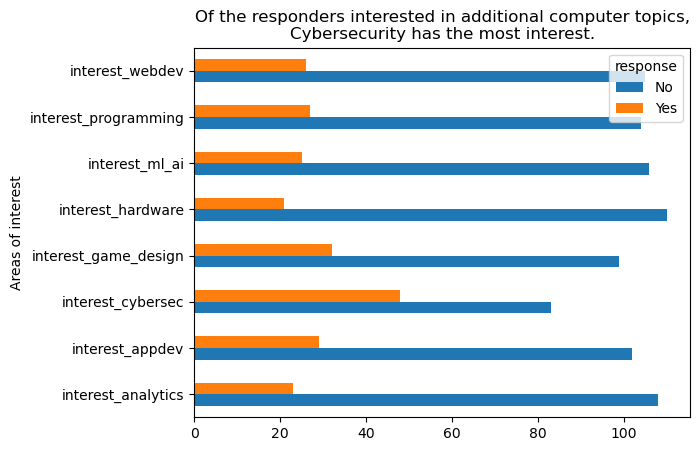

In [174]:
pivot_int.Timestamp.plot(kind='barh', title='Of the responders interested in additional computer topics,\nCybersecurity has the most interest.', ylabel = 'Areas of interest')

This second exploration focuses on those students who indicated that a middle school or high school computer class or computer club had "Some Impact" or "High Impact" on their decision to enroll at CCM and their current program.

In [159]:
df_exp_ms_hs = df_exp_melt.loc[((df_exp_melt['response_group'] == 'exp_ms_hs_comp_class') & ((df_exp_melt['response'] == 'Some Impact') | (df_exp_melt['response'] == 'High Impact'))) | ((df_exp_melt['response_group'] == 'exp_ms_hs_comp_club') & ((df_exp_melt['response'] == 'Some Impact') | (df_exp_melt['response'] == 'High Impact')))]
df_exp_ms_hs

,responder,Timestamp,curr_course,curr_prog,demo_age,demo_gender,demo_race,response_group,response
0,0,2022-09-30 11:06:53,CMP 101 Computer Information Literacy,Education,18 and younger,Woman,Hispanic or Latino,exp_ms_hs_comp_class,Some Impact
2,2,2022-09-30 11:14:01,CMP 135 Computer Concepts with Applications,Radiography,19-20,Woman,White/Caucasian,exp_ms_hs_comp_class,Some Impact
7,7,2022-10-02 13:12:55,CMP 101 Computer Information Literacy,Nursing,25-34,Woman,Black/African American,exp_ms_hs_comp_class,High Impact
8,8,2022-10-02 13:16:09,CMP 101 Computer Information Literacy,Nursing,25-34,Woman,Black/African American,exp_ms_hs_comp_class,High Impact
11,11,2022-10-02 21:25:15,CMP 101 Computer Information Literacy,Liberal Arts,18 and younger,Woman,Choose not to reply,exp_ms_hs_comp_class,Some Impact
14,14,2022-10-02 23:03:58,CMP 101 Computer Information Literacy,Liberal Arts,19-20,Woman,White/Caucasian,exp_ms_hs_comp_class,Some Impact
22,22,2022-10-03 19:49:22,CMP 135 Computer Concepts with Applications,Exercise Science,19-20,Woman,Hispanic or Latino,exp_ms_hs_comp_class,Some Impact
27,27,2022-10-04 09:54:55,CMP 126 Computer Technology and Applications,Education,25-34,Woman,White/Caucasian,exp_ms_hs_comp_class,High Impact
28,28,2022-10-04 09:55:42,CMP 126 Computer Technology and Applications,Criminal Justice,18 and younger,Man,White/Caucasian,exp_ms_hs_comp_class,Some Impact
32,32,2022-10-04 09:57:15,CMP 126 Computer Technology and Applications,Broadcasting Arts and Technology,19-20,Man,Choose not to reply,exp_ms_hs_comp_class,High Impact


In [175]:
pivot_ms_hs = pd.pivot_table(df_exp_ms_hs, index = ['curr_prog'], columns = 'response_group', aggfunc='count').fillna(0)
pivot_ms_hs.Timestamp

response_group,exp_ms_hs_comp_class,exp_ms_hs_comp_club
curr_prog,,
Biology,1.0,0.0
Broadcasting Arts and Technology,1.0,1.0
Business Administration,0.0,1.0
Communication,3.0,0.0
Computer Science,1.0,0.0
Criminal Justice,6.0,3.0
Education,4.0,0.0
Exercise Science,2.0,2.0
Human Services,1.0,0.0


<AxesSubplot: title={'center': 'Currently enrolled students who indicated MS and HS Computer Classes and Clubs\nhad some impact on their decision to enroll exhibit no clear relationship in\ntheir choice of current program.'}, ylabel='Current Program'>

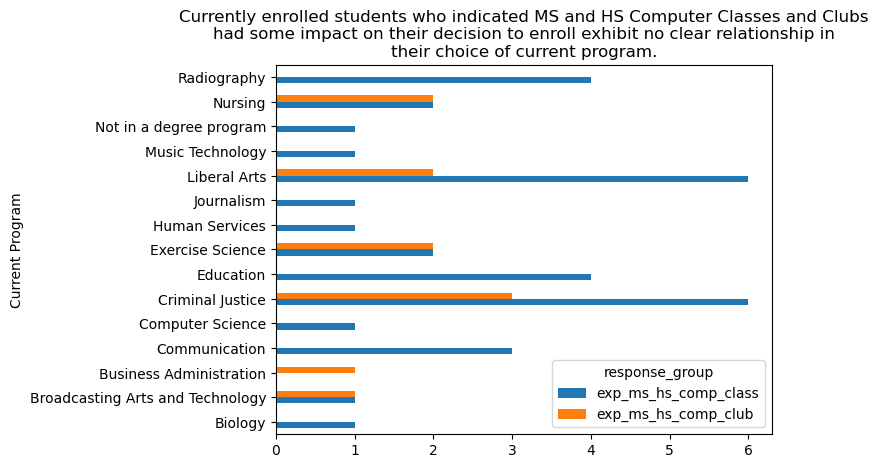

In [180]:
pivot_ms_hs.Timestamp.plot(kind='barh', ylabel = 'Current Program', rot=0, title = 'Currently enrolled students who indicated MS and HS Computer Classes and Clubs\nhad some impact on their decision to enroll exhibit no clear relationship in\ntheir choice of current program.')